In [124]:
# Import libraries

import sys
import logging
import pandas as pd
import xarray as xr
from pathlib import Path
import atlite
from atlite.gis import ExclusionContainer
import rasterio as rio
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import rioxarray

root_path = Path(globals()['_dh'][0]).resolve().parent
sys.path.append(str(root_path))

import paths
from input.weather.weather_core import load_weather

logging.basicConfig(level=logging.INFO)

In [2]:
onwind_turbine =  "2030_5MW_onshore.yaml"
offwind_turbine = "2030_20MW_offshore.yaml"

geo = 'Western Cape'
section = None
weather_start = '2023-01'
weather_end = '2023-12'

In [3]:
geojson = gpd.read_file(paths.geo_root / 'western-cape-south-africa_1334.geojson')

KEY = 'name'

area = geojson.loc[geojson[KEY].isin([geo])]

minx, miny, maxx, maxy = area.total_bounds

cutout_path = paths.weather /  f"cutout,geography={geo},start={weather_start},end={weather_end}.nc"

cutout = atlite.Cutout(
    path=cutout_path,
    module="era5",
    x=slice(minx, maxx),
    y=slice(miny, maxy),
    time=slice(weather_start,weather_end),
    dx=0.125,
    dy=0.125,
    dt="3h"
)

cutout.prepare(features=['influx', 'temperature', 'wind'])
selections = gpd.GeoDataFrame(geometry=[unary_union(area.geometry)], crs=geojson.crs)
eez = None # REPLACE with code creating eez using gpd
index = pd.to_datetime(cutout.coords['time'])

/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/cutout.py:191: UserWarning: Arguments module, x, y, time, dx, dy, dt are ignored, since cutout is already built.
  warn(
INFO:atlite.data:Storing temporary files in /tmp/tmpj9vhzv6x


In [8]:
INCLUDED_SOLAR_AND_ONWIND = [7,8,9,10,11,12,13,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,70,71,72,73]

#INCLUDED_OFFWIND = [16]

raster = rio.open(paths.geo_root / 'sanlc_western_cape.tif')

land_includer = {}

for code in INCLUDED_SOLAR_AND_ONWIND:
    li = ExclusionContainer()
    li.add_raster(raster, codes=code, invert=True, crs=raster.crs)
    land_includer[code] = li
#sea_includer = ExclusionContainer()

#land_includer.add_raster(raster, codes=INCLUDED_SOLAR_AND_ONWIND, invert=True, crs=raster.crs)
#sea_includer.add_raster(raster, codes=INCLUDED_OFFWIND, invert=True, crs=raster.crs)

In [10]:
land_availability = {code: cutout.availabilitymatrix(selections, land_includer[code]) for code in INCLUDED_SOLAR_AND_ONWIND}
#sea_availability = cutout.availabilitymatrix(selections, sea_includer)

Compute availability matrix: 100%|██████████| 1/1 [00:15<00:00, 15.75s/ gridcells]


In [11]:
#cutout_pv = cutout.pv(
#                matrix=land_availability.stack(spatial=["y", "x"]),
#                panel=atlite.solarpanels.CdTe,
#                orientation="latitude_optimal",
#                index=selections.index,
#                per_unit =True,
#            )



cutout_onwind = {code: cutout.wind(matrix=land_availability[code].stack(spatial=["y", "x"]),turbine = atlite.resource.get_windturbineconfig(paths.renewables_root / 'windturbines_core' / onwind_turbine),index=selections.index,per_unit =True) for code in INCLUDED_SOLAR_AND_ONWIND}

#cutout_offwind = cutout.wind(
#                matrix=sea_availability.stack(spatial=["y", "x"]),
#                turbine = atlite.resource.get_windturbineconfig(paths.renewables_root / 'windturbines_core' / offwind_turbine),
#                index=selections.index,
#                per_unit =True,
#            )

/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 5.04 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 5.04 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 5.04 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.73 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.73 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.73 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.84 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.73 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.93 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.93 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.93 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.73 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.05 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 11.68 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 9.41 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 7.98 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 10.15 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 11.35 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.55 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 8.18 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 7.98 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.25 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.25 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 7.40 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.76 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.25 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.15 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.45 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 7.06 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.15 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.15 s


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 6.96 s


In [13]:
flattened_cutout_onwind = {code: cutout_onwind[code].values.flatten().mean() for code in INCLUDED_SOLAR_AND_ONWIND}

In [14]:
flattened_cutout_onwind

{7: 0.22518960443225122,
 8: 0.27384077487358194,
 9: 0.20610418315277534,
 10: 0.20711204229452435,
 11: 0.35796399292214043,
 12: 0.3555690763899859,
 13: 0.18855074819165044,
 25: 0.16054694223157898,
 26: 0.33196743426748593,
 27: 0.2174386410919515,
 28: 0.0,
 30: 0.22026058972186227,
 31: 0.25954225577836054,
 32: 0.14155420423965628,
 33: 0.18195135524913764,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.2226263571996804,
 39: 0.16618762578435456,
 40: 0.24527826959219326,
 41: 0.11759958645109826,
 42: 0.24124287779832979,
 43: 0.20643435319054687,
 44: 0.23940097818167105,
 45: 0.2234214991525481,
 46: 0.25734828213645006,
 70: 0.4015156844114283,
 71: 0.379107487878249,
 72: 0.40703652650816474,
 73: 0.2414128758698079}

In [82]:
# Convert to square kilometers
cell_size = cutout.area(crs='3035')[0][0].item()
cell_size_km2 = cell_size / 1e6

# Dictionary to store surface area for each availability matrix
surface_area = {code: land_availability[code].sum().item() * cell_size_km2 for code in INCLUDED_SOLAR_AND_ONWIND}

In [83]:
surface_area

{7: 274.17221014073965,
 8: 1977.450810837091,
 9: 33411.08937163054,
 10: 16537.975007251214,
 11: 12018.208211189978,
 12: 28.384418204053414,
 13: 8658.231418217325,
 25: 1589.5330986127267,
 26: 87.98003514346802,
 27: 151.22907472812983,
 28: 0.0,
 30: 535.1087597388107,
 31: 21626.748374143262,
 32: 801.3509173137079,
 33: 1045.6358220557117,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 722.4133539680913,
 39: 512.6088190157295,
 40: 15575.726272613701,
 41: 2.3886398970243925,
 42: 154.33210044480973,
 43: 26.535609227542558,
 44: 220.49815838097544,
 45: 67.97048001149271,
 46: 2340.1017583618136,
 70: 5.194712185740493,
 71: 14.256911640618819,
 72: 1.4207104301060889,
 73: 31.287460363419463}

In [92]:
total_area = sum(surface_area.values())
print(f"total available area: {total_area}")

total available area: 118417.83251574784


In [93]:
availability_percentage = {code: surface_area[code]/total_area for code in INCLUDED_SOLAR_AND_ONWIND}

In [94]:
availability_percentage

{7: 0.0023152949544510432,
 8: 0.01669892759246475,
 9: 0.2821457601597914,
 10: 0.13965780875994252,
 11: 0.10148985128225288,
 12: 0.00023969716047858504,
 13: 0.07311594237350956,
 25: 0.013423088945673296,
 26: 0.0007429627216979162,
 27: 0.0012770802464064572,
 28: 0.0,
 30: 0.004518819069481356,
 31: 0.18263084127356596,
 32: 0.006767147314633883,
 33: 0.0088300537160791,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0061005453200810855,
 39: 0.004328814403418168,
 40: 0.13153193181898815,
 41: 2.0171285407598878e-05,
 42: 0.0013032842872232593,
 43: 0.00022408457124912932,
 44: 0.0018620350811745555,
 45: 0.0005739885502671537,
 46: 0.01976139664649422,
 70: 4.386765131045337e-05,
 71: 0.00012039497208938407,
 72: 1.199743653403853e-05,
 73: 0.00026421240533395753}

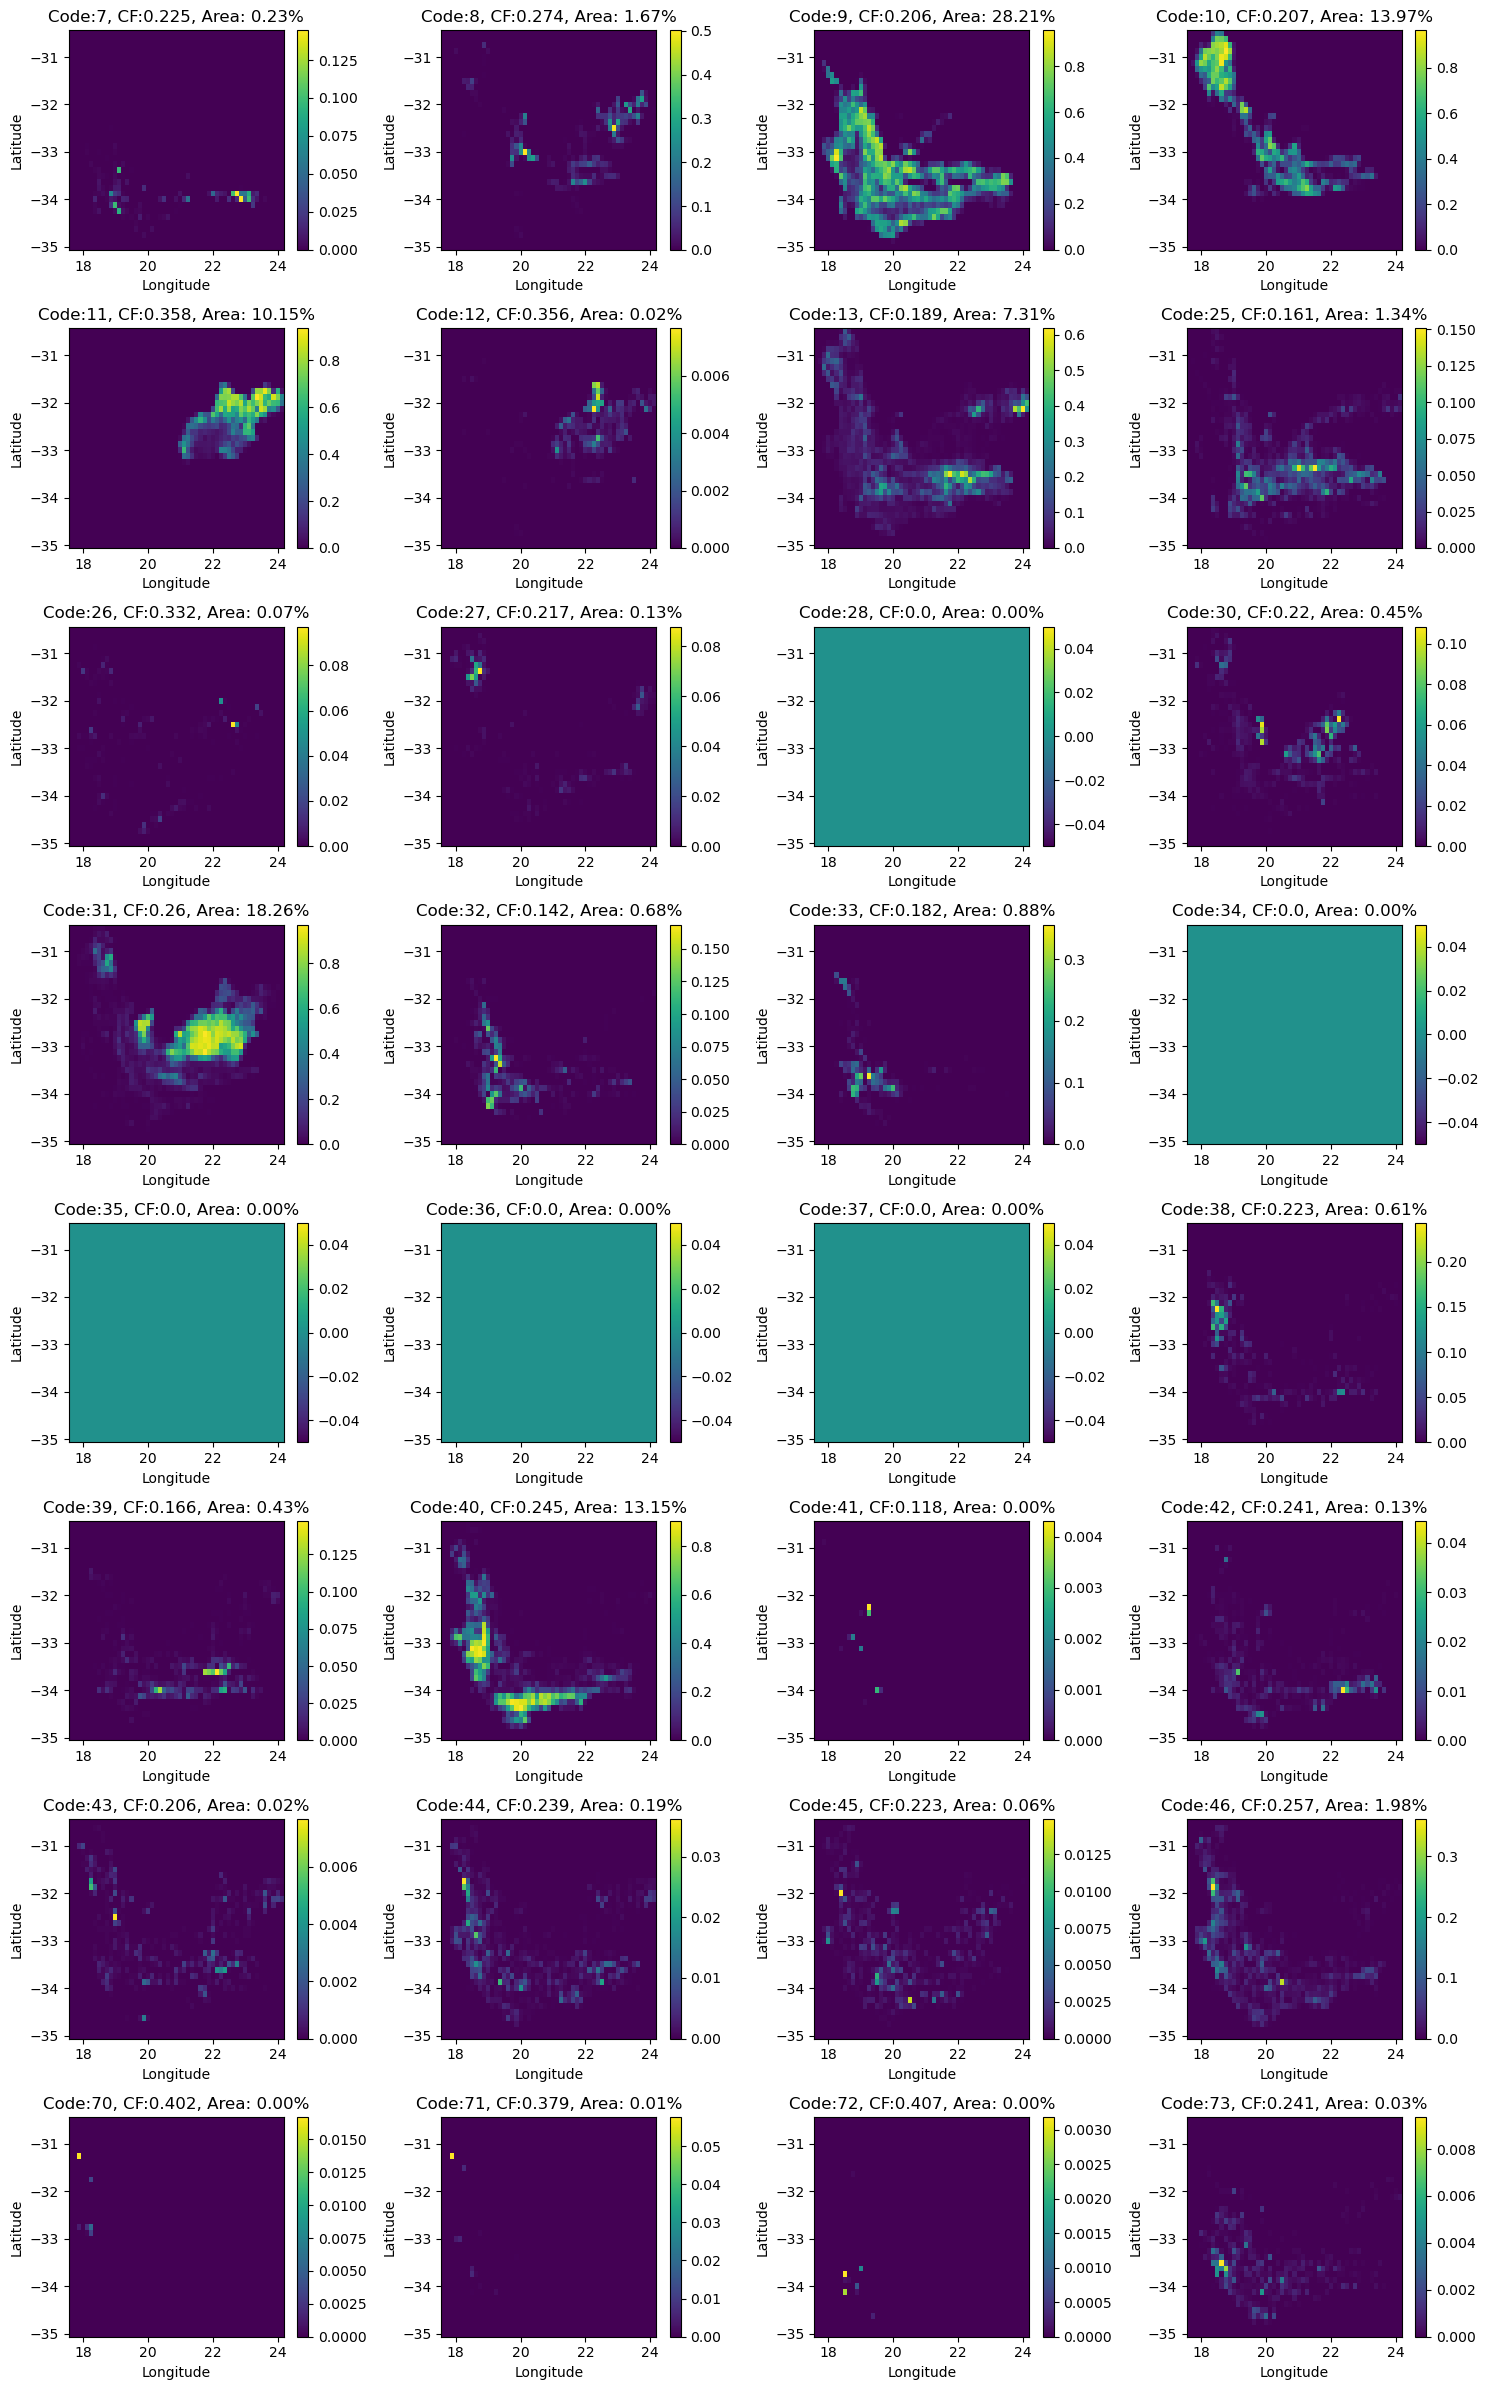

In [99]:
# Assuming `land_availability` is a dictionary with keys as class codes and values as xarray.DataArray
num_matrices = len(land_availability)
num_cols = 4  # Number of columns in the grid
num_rows = (num_matrices + num_cols - 1) // num_cols  # Calculate required number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten axes to easily iterate even if there are fewer matrices than subplots
axes = axes.flatten()

# Iterate through each availability matrix and plot it
for i, (code, matrix) in enumerate(land_availability.items()):
    matrix.squeeze().plot(ax=axes[i], cmap='viridis', add_colorbar=True)
    axes[i].set_title(f"Code:{code}, CF:{round(flattened_cutout_onwind[code],3)}, Area: {availability_percentage[code]:.2%}")
    axes[i].set_xlabel("Longitude")
    axes[i].set_ylabel("Latitude")

# Turn off any unused axes if we have empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [100]:
NEW_INCLUDED_SOLAR_AND_ONWIND = [7,8,11,12,26,27,30,31,38,40,42,43,44,45,46,70,71,72,73]

new_land_includer = ExclusionContainer()
new_land_includer.add_raster(raster, codes=NEW_INCLUDED_SOLAR_AND_ONWIND, invert=True, crs=raster.crs)

new_land_availability = cutout.availabilitymatrix(selections, new_land_includer)


Compute availability matrix: 100%|██████████| 1/1 [00:33<00:00, 33.55s/ gridcells]


In [154]:
mean_new_cutout_onwind = cutout.wind(
                matrix=new_land_availability.stack(spatial=["y", "x"]),
                turbine = atlite.resource.get_windturbineconfig(paths.renewables_root / 'windturbines_core' / onwind_turbine),
                index=selections.index,
                per_unit =True
            )

print(mean_new_cutout_onwind.mean())

/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 5.14 s
<xarray.DataArray ()> Size: 8B
array(0.27601944)


/home/viktor/miniforge3/envs/pypsa-vgr/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.95 s


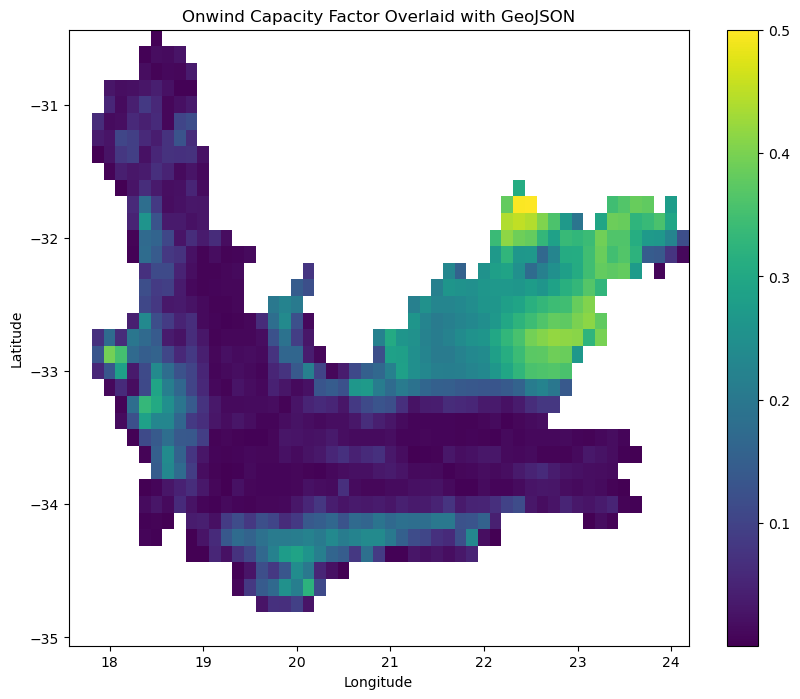

In [155]:
new_cutout_onwind = cutout.wind(
                turbine = atlite.resource.get_windturbineconfig(paths.renewables_root / 'windturbines_core' / onwind_turbine),
                capacity_factor =True,
            )

selections_gdf = selections  # If selections is already a GeoDataFrame

# Ensure that the GeoDataFrame has the same CRS as the cutout
selections_gdf = selections_gdf.to_crs(cutout.crs)

# Clip the capacity factor using the GeoJSON selection
new_cutout_onwind.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)  # Set spatial dimensions
new_cutout_onwind.rio.write_crs(cutout.crs, inplace=True)  # Assign the CRS

# Clip the capacity factor DataArray using the GeoDataFrame (mask the areas outside the selection)
clipped_onwind = new_cutout_onwind.rio.clip(selections_gdf.geometry, drop=True, invert=False)

# Set a threshold for minimum inclusion in the availability matrix
threshold = 0.001  # Only include areas with at least 20% availability

# Create a mask where values below the threshold are set to NaN
availability_mask = new_land_availability.where(new_land_availability >= threshold)

# Apply the availability mask to the capacity factor
masked_onwind_cf = new_cutout_onwind * availability_mask

# Clip the masked capacity factor using the GeoJSON selection
clipped_masked_onwind = masked_onwind_cf.rio.clip(selections_gdf.geometry, drop=True, invert=False)

clipped_masked_onwind.plot(figsize=(10, 8), cmap="viridis")
plt.title("Onwind Capacity Factor Overlaid with GeoJSON")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()